## "벗들의 딥러닝/머신러닝/데이터분석" 카카오톡 오픈채팅방 온라인 관찰 개요
1. **raw 데이터 가져오기**
- 데이터 수집 기간 : 2023.02.09. ~ 2024.11.09.
- 채팅방 이름 : '벗들의 딥러닝/머신러닝/데이터분석' 채팅방
- '네트워킹' 종류(관찰 분류를 위함) : 재학생-졸업생 네트워킹 위주(분석 전 가설)
- 방식 : Python과 pandas, matplotlib 라이브러리를 활용한 데이터 분석  
- 데이터 형식 : csv, 채팅방 내 대화 내용 저장 기능을 통해 csv 파일로 저장 <br>
- 채팅방 인원 : 710명 (기간 내 들어온 인원: / 나간 인원: )

2. **데이터 전처리** <br>
불필요한 메세지("OO님이 들어왔습니다", "OO님이 나갔습니다") 제거

3. **데이터 분석**
- 메세지 워드클라우드 시각화(Okt ver./ Hannanum ver.)
- 월별 메세지 개수
- 유저 중 헤비유저 비율 분석
- 수동 카테고라이징 <br>

4. **문서 작업** <br>
오픈채팅방 관련 설명, 온라인 관찰 진행 배경, 데이터 분석 절차 설명 등

### 1. raw 데이터 가져오기

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df_kakao = pd.read_csv('kakao_raw.csv')
df_kakao.head(5)

,Date,User,Message
0,2023-02-09 11:34:58,그린/데이터분석,"그린/데이터분석님이 들어왔습니다.\n타인, 기관 등의 사칭에 유의해 주세요. 금전 ..."
1,2023-02-09 15:39:51,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
2,2023-02-09 15:42:20,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
3,2023-02-09 16:32:07,💚/데이터분석,저 관심있어요
4,2023-02-09 19:02:22,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?


In [24]:
# 데이터 전 처리 전 raw 데이터프레임의 전체 길이 출력
len(df_kakao)

2057

### 2. 데이터 전처리 작업

In [25]:
# "OO님이 들어왔습니다/나갔습니다"는 데이터에서 제외하기

# 문구 개수를 측정하여, 기간 내 들어온 인원과 나간 인원 확인
entrance = df_kakao[df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
print("기간 내 들어온 인원:", len(entrance))

leave = df_kakao[df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]
print("기간 내 나간 인원:", len(leave))

# df_kakao에서 entrance 메세지, leave 메세지 제거하기
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]


기간 내 들어온 인원: 169
기간 내 나간 인원: 167


In [26]:
print("전처리 후 메세지 개수:", len(df_kakao))

전처리 후 메세지 개수: 1721


In [27]:
df_kakao.head(5)

,Date,User,Message
1,2023-02-09 15:39:51,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
2,2023-02-09 15:42:20,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
3,2023-02-09 16:32:07,💚/데이터분석,저 관심있어요
4,2023-02-09 19:02:22,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?
5,2023-02-09 19:02:35,./데이터분석,web scraper이용해서 스크래핑하려고하는데 각페이지마다 10개정도글이 있고 그...


In [29]:
df_kakao.to_csv('new_kakao.csv')

### 3. 데이터 분석
- 메세지 워드클라우드 시각화
- 날짜 기간별 메세지 분포도 분석
- 분기별/월별 메세지 개수
- 유저 중 헤비유저 비율 분석
- 수동 카테고라이징

In [30]:
new_df = pd.read_csv('new_kakao.csv')
new_df.head(5)

,Unnamed: 0,Date,User,Message
0,1,2023-02-09 15:39:51,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
1,2,2023-02-09 15:42:20,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
2,3,2023-02-09 16:32:07,💚/데이터분석,저 관심있어요
3,4,2023-02-09 19:02:22,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?
4,5,2023-02-09 19:02:35,./데이터분석,web scraper이용해서 스크래핑하려고하는데 각페이지마다 10개정도글이 있고 그...


### 3-1. 워드클라우드 빈출 단어 시각화

In [37]:
# 1)메세지 내용 시각화
# 정확성을 높이기 위해 2차 전처리 작업 : "삭제된 메시지입니다."도 제거
delete_msg = new_df[new_df['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]
new_df = new_df[~new_df['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]

print("기간 내 삭제된 메세지의 개수", len(delete_msg))
print(len(new_df))

df_kakao.to_csv('new2_kakao.csv')


기간 내 삭제된 메세지의 개수 0
1699


In [12]:
# 워드클라우드 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [35]:
# 한국어 자연어처리 패키지 다운로드, 단어를 쪼개서 명사만 남김
!pip install konlpy

In [11]:
# 워드클라우드에서 사용할 라이브러리 import
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt # 위 라이브러리에서 명사를 구분해 주는 함수, txt 파일은 Okt 사용
import numpy as np # 일렬 배열도 만들 거라 Numpy 사용

In [43]:
# 텍스트 분석하기
import pandas as pd
from konlpy.tag import Okt

# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv('new2_kakao.csv', encoding='utf-8')

# 분석하려는 특정 열이 'text'라고 가정
# 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(df['Message'].astype(str).tolist())

# 텍스트 분석
okt = Okt()
nouns = okt.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(c, words)

Counter({'혹시': 264, '데이터': 224, '관심': 185, '확인': 169, '대학원': 168, '사항': 144, '관련': 136, '공지': 133, '모집': 129, '생각': 125, '지원': 120, '진행': 120, '분석': 109, '지능': 104, '인공': 102, '분야': 100, '프로젝트': 96, '인턴': 94, '러닝': 94, '코드': 92, '공유': 87, '면접': 83, '추천': 82, '참여': 82, '경험': 81, '변경': 81, '교수': 78, '석사': 78, '학부': 77, '연구': 75, '공부': 74, '경우': 73, '활동': 73, '준비': 72, '채용': 71, '학기': 69, '회사': 67, '내용': 67, '질문': 66, '닉네임': 65, '디스': 62, '논문': 61, '링크': 59, '답변': 59, '공고': 59, '지금': 58, '스터디': 57, '예정': 56, '강의': 56, '고민': 52, '정말': 52, '카카오': 52, '정도': 50, '모델': 50, '시간': 50, '취업': 49, '행사': 49, '학교': 48, '직무': 48, '전공': 47, '말씀': 47, '사진': 47, '개발': 47, '연락': 46, '다른': 46, '신청': 46, '활용': 46, '파이썬': 45, '도움': 45, '오픈': 45, '과정': 44, '수업': 44, '신입': 44, '컨택': 43, '참고': 43, '마감': 43, '동아리': 43, '정보': 42, '발표': 42, '머신': 41, '기간': 41, '교육': 41, '랩실': 40, '여기': 40, '사용': 40, '저희': 38, '선배': 37, '선택': 37, '기획': 37, '사람': 36, '주제': 36, '채팅': 36, '현재': 36, '통계': 36, '기술': 36, '연구실': 35, '이번':

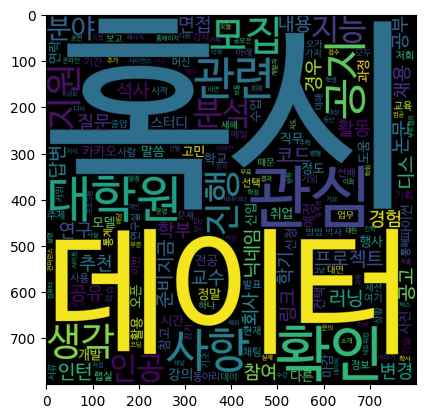

In [44]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc.png')

### 3-1. Hannanum 사용해서 워드클라우드 ver.2

In [18]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()

# 파일 열고 분석
import pandas as pd
from konlpy.tag import Hannanum

# CSV 파일을 읽고 'Message' 열 선택
tempdf = pd.read_csv('new2_kakao.csv')

# 모든 메시지를 하나의 문자열로 결합
text = ' '.join(tempdf['Message'].astype(str))

# Hannanum으로 분석
hannanum = Hannanum()
nouns = hannanum.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(words, c)

['대학원', '진학', '선배님', '의견', '산업공학', '인공지능', '연구실', '연구직', '진로', '생각', '어떨지', '고민', 'ㅠㅠ', '이거', 'ㅜㅜ', '관심', '구글', 'scraper이용해서', '스크래핑하려고하는데', '각페이지마다', '10개정도글', '그런페이지', '5개정', '설정', '페이지번호', '선택', '이사이트', '설정', '페이지번호', '선택이', '설정', '선택', '1.', '페이지번호', '문자', '2.', '페이지번호', '링크', '문자', '확인방법', '3.', '이경우', '산공', '인공지능', '연구실', '취업', '대부분', '연구직', '생각', '연구실', '연구실', '졸업생들', '취업', '회사', '기업', '한번', '졸업생', '업계', '특정', '회사들', '거기', '취업', '경우', '거기', '회사', '연구실', '연구실', '홈페이지', '섹션', '확인', '어떠실까요', '졸업생', '동향', '선배님', '안녕', '진로', '못잡', '재학중', '학부벗', '복수전공', '소프트웨어', '공부', '올해', '여름방학', '2학기', '랩실인턴', '방식', '컨택', '궁금', '교수님', '상담', '말꺼내', '자기소개서같은거', '주전공', '인문대생', '친구들', '랩실인턴', '어떤과정', '채용', '정보', '상황', '학점', '진입한지', '얼마', '과목', '컴프실,', '씨프실,', '자료구조', '알고리즘', '이정도고요,,', '(5학년이긴', '합니다만', '이번학기', '객지프,', '파이썬데이터분석,', '인공지능딥러닝,', '텍스트', '마이닝개론,', '융합소프트웨어프로젝트', '사이버보안개론', '이정도', '예정', '이번학기', '여름방학때', '학부인턴', '가능', '어떤걸', '어필', '조언', '학기중', '추천', '독학', '공부', '열정', '괜찮숩니', '학기중', '방학때', '학

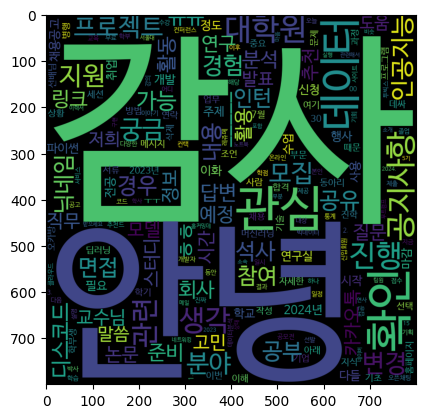

In [15]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc2.png')

#### 주요 대화 주제를 가시적으로 출력하기 위해, 불필요하다고 여겨지는 단어는 제외
-> 연구 윤리에서 벗어난다고 생각되면 제거하겠습니다.

In [21]:
words = [n for n in nouns if len(n) > 1 and n not in ["안녕", "감사", "관심", "확인"]]
# 단어 빈도수 계산
c = Counter(words)

print(c, words)

Counter({'데이터': 133, '대학원': 128, '공지사항': 126, '진행': 115, '생각': 110, '관련': 105, '지원': 90, '모집': 86, '_____': 86, '궁금': 83, '분야': 82, '프로젝트': 80, '변경': 80, '인공지능': 76, '경험': 73, '경우': 69, '석사': 69, '가능': 68, '공부': 66, '공유': 66, '참여': 66, '면접': 65, '닉네임': 65, '인턴': 62, '내용': 61, '디스코드': 61, '분석': 58, 'ㅠㅠ': 56, '링크': 56, 'ㅎㅎ': 56, '활동': 56, '답변': 55, '회사': 54, '준비': 54, '예정': 51, '연구': 50, '논문': 46, '스터디': 46, '카카오톡': 45, '교수님': 44, '추천': 44, '질문': 44, '고민': 43, '모델': 43, '직무': 43, '시간': 41, '활용': 41, '정보': 40, '저희': 40, '발표': 40, '말씀': 39, '도움': 39, '2024년': 39, '다들': 38, '이화': 38, '채용공고': 38, '수업': 37, '파이썬': 36, '주제': 36, '정도': 36, '행사': 36, '마감': 36, '개발': 35, '필요': 34, '연구실': 33, '학교': 32, '신청': 32, '시작': 32, '사용': 32, '취업': 31, '전공': 31, '머신러닝': 31, '사람': 31, '동아리': 31, '이번': 30, '아래': 30, '선택': 29, '문제': 29, '기초': 29, '삭제': 28, '연락': 28, '업무': 28, '학기': 28, '자세한': 27, '학부생': 27, '2023년': 27, '홈페이지': 26, '상황': 26, '조언': 26, '방법': 26, '오카방': 26, '세션': 26, '딥러닝': 26, '7월': 26, '진학': 25

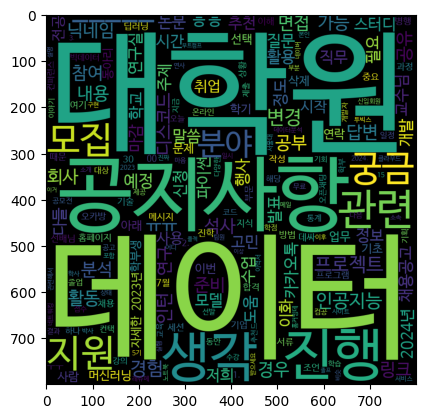

In [22]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc3.png')

### 3-2. 날짜 기간별 메세지 분포도 분석

In [32]:
new_df = pd.read_csv('new_kakao.csv')
new_df.head(5)

,Unnamed: 0,Date,User,Message
0,1,2023-02-09 15:39:51,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
1,2,2023-02-09 15:42:20,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
2,3,2023-02-09 16:32:07,💚/데이터분석,저 관심있어요
3,4,2023-02-09 19:02:22,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?
4,5,2023-02-09 19:02:35,./데이터분석,web scraper이용해서 스크래핑하려고하는데 각페이지마다 10개정도글이 있고 그...


In [33]:
# Date 열에서 날짜 부분만 남기기
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date

# Date 열을 월 단위로 변환
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.to_period('M')

new_df.head(5)

,Unnamed: 0,Date,User,Message
0,1,2023-02,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
1,2,2023-02,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
2,3,2023-02,💚/데이터분석,저 관심있어요
3,4,2023-02,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?
4,5,2023-02,./데이터분석,web scraper이용해서 스크래핑하려고하는데 각페이지마다 10개정도글이 있고 그...


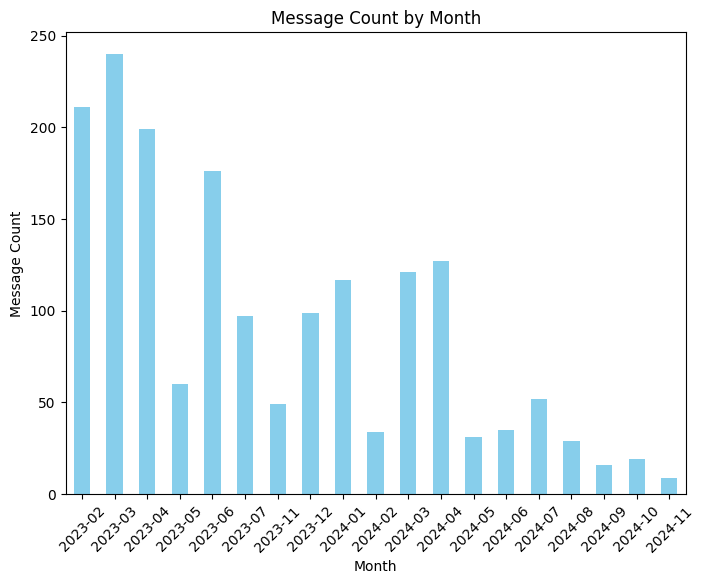

In [35]:
# 월별 메시지 수 계산 및 정렬
monthly_counts = new_df['Date'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Message Count by Month")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

### 3-3. 유저별 메세지 수 분석

In [36]:
new_df = pd.read_csv('new_kakao.csv')
new_df.head(5)

,Unnamed: 0,Date,User,Message
0,1,2023-02-09 15:39:51,딥딥/딥러닝,대학원 진학하신 선배님들께 의견 여쭙고 싶습니다. 산업공학과 내 인공지능 연구실은 ...
1,2,2023-02-09 15:42:20,벗둘/딥러닝,이거 따로 구해서 들으실분 계신가요 ㅜㅜ 제가 시기를 놓쳐버려서
2,3,2023-02-09 16:32:07,💚/데이터분석,저 관심있어요
3,4,2023-02-09 19:02:22,./데이터분석,혹시 구글에서 web scraper 써보신분 계시나요?
4,5,2023-02-09 19:02:35,./데이터분석,web scraper이용해서 스크래핑하려고하는데 각페이지마다 10개정도글이 있고 그...


In [39]:
# 'User' 별로 메시지 개수 세기
user_message_counts = new_df.groupby('User').size()

# 내림차순으로 정렬
user_message_counts = user_message_counts.sort_values(ascending=False)

# 결과 출력
print(user_message_counts)

User
방장봇                 125
벗/CV, NLP            78
불 뿜는 튜브/cv           55
라이옹/데이터분석            48
헤고/딥러닝               35
                   ... 
엄지척 제이지/머신러닝 딥러닝      1
네오/딥러닝,데분             1
엄지척 어피치/머신러닝          1
어피치/데분                1
마라/데이터분석, 머신러닝        1
Length: 274, dtype: int64
